# Human Activity Recognition Using SmartDevice Data(Phone/Watch)

In [0]:

# The applied options are for CSV files. For other file types, these will be ignored.
col = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z']
raw_par_10_phone_accel = spark.read.format("csv") \
             .option("header", "false") \
             .option("inferSchema", "true") \
             .option("delimiter", ",") \
             .load("s3://humanactivity/wisdm-dataset/raw/phone/accel/data_1610_accel_phone.txt") 
             .toDF(*col)

display(raw_par_10_phone_accel)

## EDA

In [0]:
raw_par_10_phone_accel.show(5)

+--------------+-------------+--------------+----------+---------+-----------+
|participant_id|activity_code|     timestamp|         x|        y|          z|
+--------------+-------------+--------------+----------+---------+-----------+
|          1610|            A|18687441561967| 1.1749573|13.347473|-4.0346375;|
|          1610|            A|18687491915971| 1.4081879| 7.091858|-3.8957214;|
|          1610|            A|18687542269974| 4.9325104|6.3068085|-2.3390045;|
|          1610|            A|18687592623978|0.15464783|6.1235046|-1.8314667;|
|          1610|            A|18687642977982|-2.8260345| 4.180542|-3.2118988;|
+--------------+-------------+--------------+----------+---------+-----------+
only showing top 5 rows



In [0]:
raw_par_10_phone_accel.dtypes

Out[89]: [('participant_id', 'int'),
 ('activity_code', 'string'),
 ('timestamp', 'bigint'),
 ('x', 'double'),
 ('y', 'double'),
 ('z', 'string')]

In [0]:
from pyspark.sql.functions import regexp_replace
raw_par_10_phone_accel=raw_par_10_phone_accel.withColumn('z',regexp_replace('z',';',''))

In [0]:
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType


In [0]:
from pyspark.sql.types import DoubleType
raw_par_10_phone_accel = raw_par_10_phone_accel.withColumn("z", col("z").cast(DoubleType()))

In [0]:
raw_par_10_phone_accel.dtypes

Out[93]: [('participant_id', 'int'),
 ('activity_code', 'string'),
 ('timestamp', 'bigint'),
 ('x', 'double'),
 ('y', 'double'),
 ('z', 'double')]

In [0]:
from pyspark.sql.functions import unix_timestamp
raw_par_10_phone_accel = raw_par_10_phone_accel.withColumn('timestamp', col('timestamp').cast('timestamp'))

In [0]:
raw_par_10_phone_accel.dtypes

Out[78]: [('participant_id', 'int'),
 ('activity_code', 'string'),
 ('timestamp', 'timestamp'),
 ('x', 'double'),
 ('y', 'double'),
 ('z', 'double')]

In [0]:
raw_par_10_phone_accel.show(5)

+--------------+-------------+--------------+----------+---------+----------+
|participant_id|activity_code|     timestamp|         x|        y|         z|
+--------------+-------------+--------------+----------+---------+----------+
|          1610|            A|18687441561967| 1.1749573|13.347473|-4.0346375|
|          1610|            A|18687491915971| 1.4081879| 7.091858|-3.8957214|
|          1610|            A|18687542269974| 4.9325104|6.3068085|-2.3390045|
|          1610|            A|18687592623978|0.15464783|6.1235046|-1.8314667|
|          1610|            A|18687642977982|-2.8260345| 4.180542|-3.2118988|
+--------------+-------------+--------------+----------+---------+----------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import *
columns = ['participant_id','activity_code','timestamp', 'x','y','z']
for i in columns:
    print(i,raw_par_10_phone_accel.filter(raw_par_10_phone_accel[i].isNull()).count())

participant_id 0
activity_code 0
timestamp 0
x 0
y 0
z 0


In [0]:
activity_codes_mapping = {'A': 'walking',
                          'B': 'jogging',
                          'C': 'stairs',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'G': 'brushing teeth',
                          'H': 'eating soup',
                          'I': 'eating chips',
                          'J': 'eating pasta',
                          'K': 'drinking from cup',
                          'L': 'eating sandwich',
                          'M': 'kicking soccer ball',
                          'O': 'playing catch tennis ball',
                          'P': 'dribbling basket ball',
                          'Q': 'writing',
                          'R': 'clapping',
                          'S': 'folding clothes'}

In [0]:
def activity_codes_mapping_udf(code):
    return activity_codes_mapping.get(code, 'unknown')

In [0]:
activity_color_map = {activity_codes_mapping['A']: 'lime',
                      activity_codes_mapping['B']: 'red',
                      activity_codes_mapping['C']: 'blue',
                      activity_codes_mapping['D']: 'orange',
                      activity_codes_mapping['E']: 'yellow',
                      activity_codes_mapping['F']: 'lightgreen',
                      activity_codes_mapping['G']: 'greenyellow',
                      activity_codes_mapping['H']: 'magenta',
                      activity_codes_mapping['I']: 'gold',
                      activity_codes_mapping['J']: 'cyan',
                      activity_codes_mapping['K']: 'purple',
                      activity_codes_mapping['L']: 'lightgreen',
                      activity_codes_mapping['M']: 'violet',
                      activity_codes_mapping['O']: 'limegreen',
                      activity_codes_mapping['P']: 'deepskyblue',   
                      activity_codes_mapping['Q']: 'mediumspringgreen',
                      activity_codes_mapping['R']: 'plum',
                      activity_codes_mapping['S']: 'olive'}

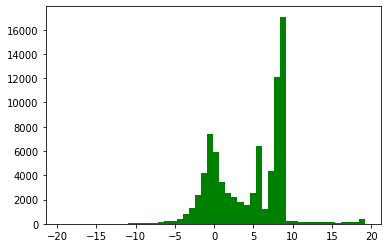

In [0]:
column_data=raw_par_10_phone_accel.select('x')
histogram = column_data.rdd.flatMap(lambda x: x).histogram(4)

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(column_data.rdd.flatMap(lambda x: x).collect(), bins=50, color='green')
plt.show()

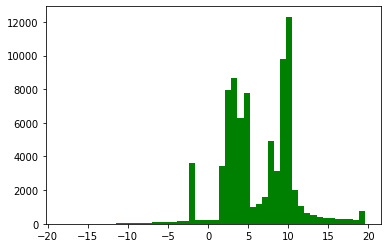

In [0]:
column_data=raw_par_10_phone_accel.select('y')
histogram = column_data.rdd.flatMap(lambda x: x).histogram(4)

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(column_data.rdd.flatMap(lambda x: x).collect(), bins=50, color='green')
plt.show()

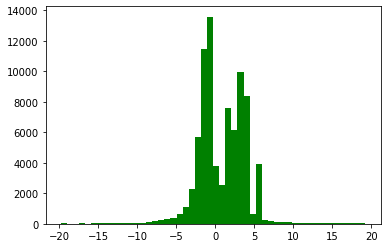

In [0]:
column_data=raw_par_10_phone_accel.select('z')
histogram = column_data.rdd.flatMap(lambda x: x).histogram(4)

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(column_data.rdd.flatMap(lambda x: x).collect(), bins=50, color='green')
plt.show()

In [0]:
def show_accel_per_activity(device, df, act, interval_in_sec = None):
  ''' Plots acceleration time history per activity '''

  df1 = df.loc[df.activity_code == act].copy()
  df1.reset_index(drop = True, inplace = True)
  
  df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000 # nanoseconds --> seconds
  
  if interval_in_sec == None:
    ax = df1[:].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)
  else:
    ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)

  ax.set_xlabel('duration  (sec)', fontsize = 15)
  ax.set_ylabel('acceleration  (m/sec^2)',fontsize = 15)
  ax.set_title('Acceleration:   Device: ' + device + '      Activity:  ' +activity_codes_mapping[act], fontsize = 15)

In [0]:
raw_par_10_phone_accel_pan=raw_par_10_phone_accel.toPandas()

In [0]:
for key in activity_codes_mapping:
  show_accel_per_activity('Phone', raw_par_10_phone_accel_pan, key, 10)

In [0]:
col = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z']
raw_par_20_watch_accel = spark.read.format("csv") \
             .option("header", "false") \
             .option("inferSchema", "true") \
             .option("delimiter", ",") \
             .load("s3://humanactivity/wisdm-dataset/raw/watch/accel/data_1620_accel_watch.txt") \
             .toDF(*col)

display(raw_par_20_watch_accel)

In [0]:
from pyspark.sql.functions import regexp_replace
raw_par_20_watch_accel=raw_par_20_watch_accel.withColumn('z',regexp_replace('z',';',''))


In [0]:
from pyspark.sql.types import DoubleType
raw_par_20_watch_accel = raw_par_20_watch_accel.withColumn("z", col("z").cast(DoubleType()))

In [0]:
raw_par_20_watch_accel.dtypes

Out[24]: [('participant_id', 'int'),
 ('activity_code', 'string'),
 ('timestamp', 'bigint'),
 ('x', 'double'),
 ('y', 'double'),
 ('z', 'double')]

In [0]:
from pyspark.sql.functions import unix_timestamp
raw_par_20_watch_accel = raw_par_20_watch_accel.withColumn('timestamp', col('timestamp').cast('timestamp'))

In [0]:
raw_par_20_watch_accel.show(4)

+--------------+-------------+--------------------+---------+----------+----------+
|participant_id|activity_code|           timestamp|        x|         y|         z|
+--------------+-------------+--------------------+---------+----------+----------+
|          1620|            A|+35310-10-16 07:3...|3.4174237|-2.1649568| -4.849306|
|          1620|            A|+35312-05-11 05:3...|5.4237647|-6.9366007| -4.954651|
|          1620|            A|+35313-12-05 03:3...|4.7007155| -3.127426|-7.6481276|
|          1620|            A|+35315-07-01 01:3...| 8.033444|-4.7004166|-5.0240827|
+--------------+-------------+--------------------+---------+----------+----------+
only showing top 4 rows



In [0]:
raw_par_20_watch_accel.dtypes

Out[12]: [('participant_id', 'int'),
 ('activity_code', 'string'),
 ('timestamp', 'timestamp'),
 ('x', 'double'),
 ('y', 'double'),
 ('z', 'double')]

In [0]:
from pyspark.sql.functions import *
columns = ['participant_id','activity_code','timestamp', 'x','y','z']
for i in columns:
    print(i,raw_par_20_watch_accel.filter(raw_par_20_watch_accel[i].isNull()).count())

participant_id 0
activity_code 0
timestamp 0
x 0
y 0
z 0


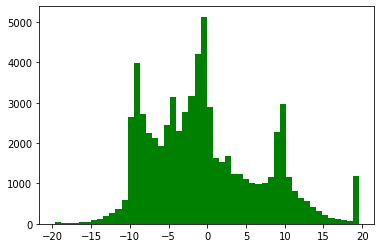

In [0]:
column_data=raw_par_20_watch_accel.select('x')
histogram = column_data.rdd.flatMap(lambda x: x).histogram(4)

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(column_data.rdd.flatMap(lambda x: x).collect(), bins=50, color='green')
plt.show()

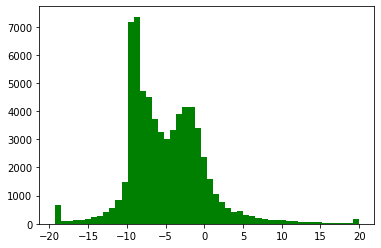

In [0]:
column_data=raw_par_20_watch_accel.select('y')
histogram = column_data.rdd.flatMap(lambda x: x).histogram(4)

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(column_data.rdd.flatMap(lambda x: x).collect(), bins=50, color='green')
plt.show()

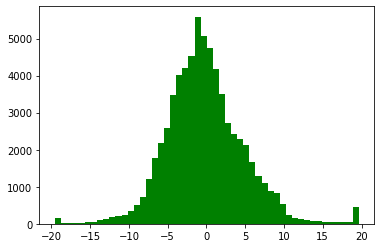

In [0]:
column_data=raw_par_20_watch_accel.select('z')
histogram = column_data.rdd.flatMap(lambda x: x).histogram(4)

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(column_data.rdd.flatMap(lambda x: x).collect(), bins=50, color='green')
plt.show()

In [0]:
raw_par_20_watch_accel_pan=raw_par_20_watch_accel.toPandas()

In [0]:
for key in activity_codes_mapping:
  show_accel_per_activity('Watch', raw_par_20_watch_accel_pan, key, 10)

In [0]:
col = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z']
raw_par_35_phone_gyro = spark.read.format("csv") \
             .option("header", "false") \
             .option("inferSchema", "true") \
             .option("delimiter", ",") \
             .load("s3://humanactivity/wisdm-dataset/raw/phone/gyro/data_1635_gyro_phone.txt") \
             .toDF(*col)

display(raw_par_35_phone_gyro)

In [0]:
raw_par_35_phone_gyro=raw_par_35_phone_gyro.withColumn('z',regexp_replace('z',';',''))


In [0]:
from pyspark.sql.functions import col
raw_par_35_phone_gyro = raw_par_35_phone_gyro.withColumn("z", col("z").cast(DoubleType()))
raw_par_35_phone_gyro.dtypes


Out[39]: [('participant_id', 'int'),
 ('activity_code', 'string'),
 ('timestamp', 'bigint'),
 ('x', 'double'),
 ('y', 'double'),
 ('z', 'double')]

In [0]:
from pyspark.sql.functions import *
columns = ['participant_id','activity_code','timestamp', 'x','y','z']
for i in columns:
    print(i,raw_par_35_phone_gyro.filter(raw_par_35_phone_gyro[i].isNull()).count())


participant_id 0
activity_code 0
timestamp 0
x 0
y 0
z 0


In [0]:
column_data=raw_par_35_phone_gyro.select('x')
histogram = column_data.rdd.flatMap(lambda x: x).histogram(4)

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(column_data.rdd.flatMap(lambda x: x).collect(), bins=50, color='green')
plt.show()


column_data=raw_par_35_phone_gyro.select('y')
histogram = column_data.rdd.flatMap(lambda x: x).histogram(4)

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(column_data.rdd.flatMap(lambda x: x).collect(), bins=50, color='green')
plt.show()



column_data=raw_par_35_phone_gyro.select('z')
histogram = column_data.rdd.flatMap(lambda x: x).histogram(4)

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(column_data.rdd.flatMap(lambda x: x).collect(), bins=50, color='green')
plt.show()

In [0]:
raw_par_35_phone_gyro_pan=raw_par_35_phone_gyro.toPandas()

In [0]:
def show_ang_velocity_per_activity(device, df, act, interval_in_sec = None):
  ''' Plots angular volocity time history per activity '''

  df1 = df.loc[df.activity_code == act].copy()
  df1.reset_index(drop = True, inplace = True)

  df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000 # nanoseconds --> seconds

  if interval_in_sec == None:
    ax = df1[:].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)
  else:
    ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)

  ax.set_xlabel('duration  (sec)', fontsize = 15)
  ax.set_ylabel('angular velocity  (rad/sec)',fontsize = 15)
  ax.set_title('Angular velocity:  Device: ' + device + '      Activity:  ' +activity_codes_mapping[act] , fontsize = 15)

In [0]:
for key in activity_codes_mapping:
  show_ang_velocity_per_activity('Phone', raw_par_35_phone_gyro_pan, key)

In [0]:
col = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z']
raw_par_35_watch_gyro = spark.read.format("csv") \
             .option("header", "false") \
             .option("inferSchema", "true") \
             .option("delimiter", ",") \
             .load("s3://humanactivity/wisdm-dataset/raw/watch/gyro/data_1635_gyro_watch.txt") \
             .toDF(*col)

display(raw_par_35_watch_gyro)

In [0]:
raw_par_35_watch_gyro=raw_par_35_watch_gyro.withColumn('z',regexp_replace('z',';',''))

In [0]:
from pyspark.sql.functions import col
raw_par_35_watch_gyro = raw_par_35_watch_gyro.withColumn("z", col("z").cast(DoubleType()))
raw_par_35_watch_gyro.dtypes

Out[60]: [('participant_id', 'int'),
 ('activity_code', 'string'),
 ('timestamp', 'bigint'),
 ('x', 'double'),
 ('y', 'double'),
 ('z', 'double')]

In [0]:
from pyspark.sql.functions import *
columns = ['participant_id','activity_code','timestamp', 'x','y','z']
for i in columns:
    print(i,raw_par_35_watch_gyro.filter(raw_par_35_watch_gyro[i].isNull()).count())

participant_id 0
activity_code 0
timestamp 0
x 0
y 0
z 0


In [0]:
column_data=raw_par_35_watch_gyro.select('x')
histogram = column_data.rdd.flatMap(lambda x: x).histogram(4)

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(column_data.rdd.flatMap(lambda x: x).collect(), bins=50, color='green')
plt.show()


column_data=raw_par_35_watch_gyro.select('y')
histogram = column_data.rdd.flatMap(lambda x: x).histogram(4)

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(column_data.rdd.flatMap(lambda x: x).collect(), bins=50, color='green')
plt.show()



column_data=raw_par_35_watch_gyro.select('z')
histogram = column_data.rdd.flatMap(lambda x: x).histogram(4)

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(column_data.rdd.flatMap(lambda x: x).collect(), bins=50, color='green')
plt.show()

In [0]:
raw_par_35_watch_gyro_pan=raw_par_35_watch_gyro.toPandas()

In [0]:
for key in activity_codes_mapping:
  show_ang_velocity_per_activity('Watch', raw_par_35_watch_gyro_pan, key)

In [0]:
features = ['ACTIVITY',
            'X0', # 1st bin fraction of x axis acceleration distribution
            'X1', # 2nd bin fraction ...
            'X2',
            'X3',
            'X4',
            'X5',
            'X6',
            'X7',
            'X8',
            'X9',
            'Y0', # 1st bin fraction of y axis acceleration distribution
            'Y1', # 2nd bin fraction ...
            'Y2',
            'Y3',
            'Y4',
            'Y5',
            'Y6',
            'Y7',
            'Y8',
            'Y9',
            'Z0', # 1st bin fraction of z axis acceleration distribution
            'Z1', # 2nd bin fraction ...
            'Z2',
            'Z3',
            'Z4',
            'Z5',
            'Z6',
            'Z7',
            'Z8',
            'Z9',
            'XAVG', # average sensor value over the window (per axis)
            'YAVG',
            'ZAVG',
            'XPEAK', # Time in milliseconds between the peaks in the wave associated with most activities. heuristically determined (per axis)
            'YPEAK',
            'ZPEAK',
            'XABSOLDEV', # Average absolute difference between the each of the 200 readings and the mean of those values (per axis)
            'YABSOLDEV',
            'ZABSOLDEV',
            'XSTANDDEV', # Standard deviation of the 200 window's values (per axis)  ***BUG!***
            'YSTANDDEV',
            'ZSTANDDEV',
            'XVAR', # Variance of the 200 window's values (per axis)   ***BUG!***
            'YVAR',
            'ZVAR',
            'XMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'XMFCC1',
            'XMFCC2',
            'XMFCC3',
            'XMFCC4',
            'XMFCC5',
            'XMFCC6',
            'XMFCC7',
            'XMFCC8',
            'XMFCC9',
            'XMFCC10',
            'XMFCC11',
            'XMFCC12',
            'YMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'YMFCC1',
            'YMFCC2',
            'YMFCC3',
            'YMFCC4',
            'YMFCC5',
            'YMFCC6',
            'YMFCC7',
            'YMFCC8',
            'YMFCC9',
            'YMFCC10',
            'YMFCC11',
            'YMFCC12',
            'ZMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'ZMFCC1',
            'ZMFCC2',
            'ZMFCC3',
            'ZMFCC4',
            'ZMFCC5',
            'ZMFCC6',
            'ZMFCC7',
            'ZMFCC8',
            'ZMFCC9',
            'ZMFCC10',
            'ZMFCC11',
            'ZMFCC12',
            'XYCOS', # The cosine distances between sensor values for pairs of axes (three pairs of axes)
            'XZCOS',
            'YZCOS',
            'XYCOR', # The correlation between sensor values for pairs of axes (three pairs of axes)
            'XZCOR',
            'YZCOR',
            'RESULTANT', # Average resultant value, computed by squaring each matching x, y, and z value, summing them, taking the square root, and then averaging these values over the 200 readings
            'PARTICIPANT'] # Categirical: 1600 -1650

len(features)

Out[1]: 93

In [0]:
path = 's3://humanactivity/wisdm-dataset/arff_files/phone/all_phone_accel'
all_phone_accel = spark.read.csv(path,header=True)
all_phone_accel.select("X0").show(4)


+-----+
|   X0|
+-----+
|0.235|
|0.275|
| 0.32|
|0.315|
+-----+
only showing top 4 rows



In [0]:
all_phone_accel.columns

Out[29]: ['ACTIVITY',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'Y0',
 'Y1',
 'Y2',
 'Y3',
 'Y4',
 'Y5',
 'Y6',
 'Y7',
 'Y8',
 'Y9',
 'Z0',
 'Z1',
 'Z2',
 'Z3',
 'Z4',
 'Z5',
 'Z6',
 'Z7',
 'Z8',
 'Z9',
 'XAVG',
 'YAVG',
 'ZAVG',
 'XPEAK',
 'YPEAK',
 'ZPEAK',
 'XABSOLDEV',
 'YABSOLDEV',
 'ZABSOLDEV',
 'XMFCC0',
 'XMFCC1',
 'XMFCC2',
 'XMFCC3',
 'XMFCC4',
 'XMFCC5',
 'XMFCC6',
 'XMFCC7',
 'XMFCC8',
 'XMFCC9',
 'XMFCC10',
 'XMFCC11',
 'XMFCC12',
 'YMFCC0',
 'YMFCC1',
 'YMFCC2',
 'YMFCC3',
 'YMFCC4',
 'YMFCC5',
 'YMFCC6',
 'YMFCC7',
 'YMFCC8',
 'YMFCC9',
 'YMFCC10',
 'YMFCC11',
 'YMFCC12',
 'ZMFCC0',
 'ZMFCC1',
 'ZMFCC2',
 'ZMFCC3',
 'ZMFCC4',
 'ZMFCC5',
 'ZMFCC6',
 'ZMFCC7',
 'ZMFCC8',
 'ZMFCC9',
 'ZMFCC10',
 'ZMFCC11',
 'ZMFCC12',
 'XYCOS',
 'XZCOS',
 'YZCOS',
 'XYCOR',
 'XZCOR',
 'YZCOR',
 'RESULTANT']

In [0]:
all_phone_accel.dtypes

Out[4]: [('ACTIVITY', 'string'),
 ('X0', 'string'),
 ('X1', 'string'),
 ('X2', 'string'),
 ('X3', 'string'),
 ('X4', 'string'),
 ('X5', 'string'),
 ('X6', 'string'),
 ('X7', 'string'),
 ('X8', 'string'),
 ('X9', 'string'),
 ('Y0', 'string'),
 ('Y1', 'string'),
 ('Y2', 'string'),
 ('Y3', 'string'),
 ('Y4', 'string'),
 ('Y5', 'string'),
 ('Y6', 'string'),
 ('Y7', 'string'),
 ('Y8', 'string'),
 ('Y9', 'string'),
 ('Z0', 'string'),
 ('Z1', 'string'),
 ('Z2', 'string'),
 ('Z3', 'string'),
 ('Z4', 'string'),
 ('Z5', 'string'),
 ('Z6', 'string'),
 ('Z7', 'string'),
 ('Z8', 'string'),
 ('Z9', 'string'),
 ('XAVG', 'string'),
 ('YAVG', 'string'),
 ('ZAVG', 'string'),
 ('XPEAK', 'string'),
 ('YPEAK', 'string'),
 ('ZPEAK', 'string'),
 ('XABSOLDEV', 'string'),
 ('YABSOLDEV', 'string'),
 ('ZABSOLDEV', 'string'),
 ('XSTANDDEV', 'string'),
 ('YSTANDDEV', 'string'),
 ('ZSTANDDEV', 'string'),
 ('XVAR', 'string'),
 ('YVAR', 'string'),
 ('ZVAR', 'string'),
 ('XMFCC0', 'string'),
 ('XMFCC1', 'string'),
 ('

In [0]:
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
for coli in all_phone_accel.columns:
    if coli == 'ACTIVITY':
        continue
    else:
        all_phone_accel = all_phone_accel.withColumn(coli, col(coli).cast(DoubleType()))
        

In [0]:
all_phone_accel.dtypes

Out[8]: [('ACTIVITY', 'string'),
 ('X0', 'double'),
 ('X1', 'double'),
 ('X2', 'double'),
 ('X3', 'double'),
 ('X4', 'double'),
 ('X5', 'double'),
 ('X6', 'double'),
 ('X7', 'double'),
 ('X8', 'double'),
 ('X9', 'double'),
 ('Y0', 'double'),
 ('Y1', 'double'),
 ('Y2', 'double'),
 ('Y3', 'double'),
 ('Y4', 'double'),
 ('Y5', 'double'),
 ('Y6', 'double'),
 ('Y7', 'double'),
 ('Y8', 'double'),
 ('Y9', 'double'),
 ('Z0', 'double'),
 ('Z1', 'double'),
 ('Z2', 'double'),
 ('Z3', 'double'),
 ('Z4', 'double'),
 ('Z5', 'double'),
 ('Z6', 'double'),
 ('Z7', 'double'),
 ('Z8', 'double'),
 ('Z9', 'double'),
 ('XAVG', 'double'),
 ('YAVG', 'double'),
 ('ZAVG', 'double'),
 ('XPEAK', 'double'),
 ('YPEAK', 'double'),
 ('ZPEAK', 'double'),
 ('XABSOLDEV', 'double'),
 ('YABSOLDEV', 'double'),
 ('ZABSOLDEV', 'double'),
 ('XSTANDDEV', 'double'),
 ('YSTANDDEV', 'double'),
 ('ZSTANDDEV', 'double'),
 ('XVAR', 'double'),
 ('YVAR', 'double'),
 ('ZVAR', 'double'),
 ('XMFCC0', 'double'),
 ('XMFCC1', 'double'),
 ('

In [0]:
for coli in all_phone_accel.columns:
    print(coli,all_phone_accel.filter(all_phone_accel[coli].isNull()).count())

ACTIVITY 0
X0 0
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
Y0 0
Y1 0
Y2 0
Y3 0
Y4 0
Y5 0
Y6 0
Y7 0
Y8 0
Y9 0
Z0 0
Z1 0
Z2 0
Z3 0
Z4 0
Z5 0
Z6 0
Z7 0
Z8 0
Z9 0
XAVG 0
YAVG 0
ZAVG 0
XPEAK 0
YPEAK 0
ZPEAK 0
XABSOLDEV 0
YABSOLDEV 0
ZABSOLDEV 0
XSTANDDEV 0
YSTANDDEV 0
ZSTANDDEV 0
XVAR 0
YVAR 0
ZVAR 0
XMFCC0 0
XMFCC1 0
XMFCC2 0
XMFCC3 0
XMFCC4 0
XMFCC5 0
XMFCC6 0
XMFCC7 0
XMFCC8 0
XMFCC9 0
XMFCC10 0
XMFCC11 0
XMFCC12 0
YMFCC0 0
YMFCC1 0
YMFCC2 0
YMFCC3 0
YMFCC4 0
YMFCC5 0
YMFCC6 0
YMFCC7 0
YMFCC8 0
YMFCC9 0
YMFCC10 0
YMFCC11 0
YMFCC12 0
ZMFCC0 0
ZMFCC1 0
ZMFCC2 0
ZMFCC3 0
ZMFCC4 0
ZMFCC5 0
ZMFCC6 0
ZMFCC7 0
ZMFCC8 0
ZMFCC9 0
ZMFCC10 0
ZMFCC11 0
ZMFCC12 0
XYCOS 0
XZCOS 0
YZCOS 0
XYCOR 0
XZCOR 0
YZCOR 0
RESULTANT 0
PARTICIPANT 0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by activity and count the rows
activity_counts = all_phone_accel.groupBy('ACTIVITY') \
    .count() \
    .orderBy('count', ascending=False)

# Convert to Pandas DataFrame
activity_counts_pd = activity_counts.toPandas()

# Plot the results
_ = activity_counts_pd.plot(kind='bar', x='ACTIVITY', y='count',
                            figsize=(15, 5), color='purple',
                            title='row count per activity',
                            legend=True, fontsize=15)
plt.show()

In [0]:
# Group by activity and count the rows
activity_counts = all_phone_accel.groupBy('PARTICIPANT') \
    .count() \
    .orderBy('count', ascending=False)

# Convert to Pandas DataFrame
activity_counts_pd = activity_counts.toPandas()

# Plot the results
_ = activity_counts_pd.plot(kind='bar', x='PARTICIPANT', y='count',
                            figsize=(15, 5), color='purple',
                            title='row count per PARTICIPANT',
                            legend=True, fontsize=15)
plt.show()

In [0]:
all_phone_accel[['XABSOLDEV', 'YABSOLDEV','ZABSOLDEV','XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR']].show(4)

+---------+---------+---------+---------+---------+---------+--------+--------+--------+
|XABSOLDEV|YABSOLDEV|ZABSOLDEV|XSTANDDEV|YSTANDDEV|ZSTANDDEV|    XVAR|    YVAR|    ZVAR|
+---------+---------+---------+---------+---------+---------+--------+--------+--------+
|  1.59095|  3.29508|  1.60941|  0.14117| 0.283329|   0.1598|0.375726|0.532286| 0.39975|
|  1.77817|   3.3349|  1.68296| 0.161229| 0.287955| 0.157993|0.401533|0.536614|0.397483|
|  1.70505|  3.14244|  1.69288|   0.1562| 0.269307| 0.159797|0.395221|0.518948|0.399746|
|  1.62315|   3.3279|  1.57944| 0.141721| 0.283364| 0.154396|0.376459| 0.53232|0.392933|
+---------+---------+---------+---------+---------+---------+--------+--------+--------+
only showing top 4 rows



In [0]:
all_phone_accel = all_phone_accel.drop('XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR')

In [0]:
all_phone_accel.columns

Out[26]: ['ACTIVITY',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'Y0',
 'Y1',
 'Y2',
 'Y3',
 'Y4',
 'Y5',
 'Y6',
 'Y7',
 'Y8',
 'Y9',
 'Z0',
 'Z1',
 'Z2',
 'Z3',
 'Z4',
 'Z5',
 'Z6',
 'Z7',
 'Z8',
 'Z9',
 'XAVG',
 'YAVG',
 'ZAVG',
 'XPEAK',
 'YPEAK',
 'ZPEAK',
 'XABSOLDEV',
 'YABSOLDEV',
 'ZABSOLDEV',
 'XMFCC0',
 'XMFCC1',
 'XMFCC2',
 'XMFCC3',
 'XMFCC4',
 'XMFCC5',
 'XMFCC6',
 'XMFCC7',
 'XMFCC8',
 'XMFCC9',
 'XMFCC10',
 'XMFCC11',
 'XMFCC12',
 'YMFCC0',
 'YMFCC1',
 'YMFCC2',
 'YMFCC3',
 'YMFCC4',
 'YMFCC5',
 'YMFCC6',
 'YMFCC7',
 'YMFCC8',
 'YMFCC9',
 'YMFCC10',
 'YMFCC11',
 'YMFCC12',
 'ZMFCC0',
 'ZMFCC1',
 'ZMFCC2',
 'ZMFCC3',
 'ZMFCC4',
 'ZMFCC5',
 'ZMFCC6',
 'ZMFCC7',
 'ZMFCC8',
 'ZMFCC9',
 'ZMFCC10',
 'ZMFCC11',
 'ZMFCC12',
 'XYCOS',
 'XZCOS',
 'YZCOS',
 'XYCOR',
 'XZCOR',
 'YZCOR',
 'RESULTANT',
 'PARTICIPANT']

In [0]:
all_phone_accel = all_phone_accel.drop('PARTICIPANT')

In [0]:
all_phone_accel.columns

Out[30]: ['ACTIVITY',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'Y0',
 'Y1',
 'Y2',
 'Y3',
 'Y4',
 'Y5',
 'Y6',
 'Y7',
 'Y8',
 'Y9',
 'Z0',
 'Z1',
 'Z2',
 'Z3',
 'Z4',
 'Z5',
 'Z6',
 'Z7',
 'Z8',
 'Z9',
 'XAVG',
 'YAVG',
 'ZAVG',
 'XPEAK',
 'YPEAK',
 'ZPEAK',
 'XABSOLDEV',
 'YABSOLDEV',
 'ZABSOLDEV',
 'XMFCC0',
 'XMFCC1',
 'XMFCC2',
 'XMFCC3',
 'XMFCC4',
 'XMFCC5',
 'XMFCC6',
 'XMFCC7',
 'XMFCC8',
 'XMFCC9',
 'XMFCC10',
 'XMFCC11',
 'XMFCC12',
 'YMFCC0',
 'YMFCC1',
 'YMFCC2',
 'YMFCC3',
 'YMFCC4',
 'YMFCC5',
 'YMFCC6',
 'YMFCC7',
 'YMFCC8',
 'YMFCC9',
 'YMFCC10',
 'YMFCC11',
 'YMFCC12',
 'ZMFCC0',
 'ZMFCC1',
 'ZMFCC2',
 'ZMFCC3',
 'ZMFCC4',
 'ZMFCC5',
 'ZMFCC6',
 'ZMFCC7',
 'ZMFCC8',
 'ZMFCC9',
 'ZMFCC10',
 'ZMFCC11',
 'ZMFCC12',
 'XYCOS',
 'XZCOS',
 'YZCOS',
 'XYCOR',
 'XZCOR',
 'YZCOR',
 'RESULTANT']

In [0]:
X_train = spark.read.csv("s3://humanactivity/Train_test_spllit/X_train",header=True)
X_test = spark.read.csv("s3://humanactivity/Train_test_spllit/X_test",header=True)
y_train=spark.read.csv("s3://humanactivity/Train_test_spllit/y_train",header=True)
y_test= spark.read.csv("s3://humanactivity/Train_test_spllit/y_test",header=True)

In [0]:
X_train.show(4)

+-----+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+-----+----+----+-----+---+---+---+---+---+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+----------+---------+-----------+-------------------+
|   X0|   X1| X2| X3| X4| X5| X6| X7| X8| X9| Y0| Y1| Y2| Y3| Y4| Y5| Y6| Y7| Y8| Y9| Z0|   Z1|  Z2|  Z3|   Z4| Z5| Z6| Z7| Z8| Z9|                XAVG|                YAVG|               ZAVG|              XPEAK|              YPEAK|    

In [0]:
X_test.show(4)

+-----+-----+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+-----+----+----+-----+----+---+---+---+---+---+-------------------+--------------------+--------------------+-------------------+-------------------+------------------+--------------------+--------------------+--------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+--------+--------+---------+--------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+--------+----------+---------+----------+-------------------+
|   X0|   X1|  X2|  X3| X4| X5| X6| X7| X8| X9| Y0| Y1| Y2| Y3| Y4| Y5| Y6| Y7| Y8| Y9|   Z0|  Z1|  Z2|   Z3|  Z4| Z5| Z6| Z7| Z8| Z9|               XAVG|                YAVG|                ZAVG|              XPEAK|              YPEAK|   

In [0]:
y_train.show(4)

+---+
|  Y|
+---+
|  H|
|  D|
|  D|
|  Q|
+---+
only showing top 4 rows



In [0]:
y_test.show(4)

+--------+
|ACTIVITY|
+--------+
|       F|
|       F|
|       M|
|       D|
+--------+
only showing top 4 rows



In [0]:
X_test.count(),X_train.count()

Out[52]: (5163, 15485)

In [0]:
y_test.count(),y_train.count()

Out[53]: (5163, 15485)

In [0]:
par_23_df = spark.read.csv("s3://humanactivity/Cluster_diagram/par_23_df",header=True)

In [0]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame
par_23_pd_df = par_23_df.toPandas()

# Extract the features and the target variable from the Pandas DataFrame
yy = par_23_pd_df['ACTIVITY']
XX = par_23_pd_df.drop(['ACTIVITY','PARTICIPANT','ACT','XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR'], axis = 1)

# Apply t-SNE to reduce the dimensionality of the feature space to 2 dimensions
tsne = TSNE(n_components=2, random_state=300)
X_2d = tsne.fit_transform(XX)

# Plot the t-SNE visualization using Matplotlib
target_ids = tuple(activity_codes_mapping.keys())

plt.figure(figsize=(10, 10))
colors = 'lime', 'red', 'blue', 'orange', 'yellow', 'lightgreen', 'greenyellow', 'magenta', 'gold', 'cyan', 'purple', 'lightgreen', 'violet', 'limegreen', 'deepskyblue', 'mediumspringgreen', 'plum', 'olive'

for i, c, label in zip(target_ids, colors, tuple(activity_codes_mapping.values())):
    plt.scatter(X_2d[yy == i, 0], X_2d[yy == i, 1], c=c, label=label)

plt.legend()
plt.show()

In [0]:
par_35_df = spark.read.csv("s3://humanactivity/Cluster_diagram/par_35_df",header=True)

In [0]:
# Convert the PySpark DataFrame to a Pandas DataFrame
par_35_pd_df = par_35_df.toPandas()

# Extract the features and the target variable from the Pandas DataFrame
yy = par_23_pd_df['ACTIVITY']
XX = par_23_pd_df.drop(['ACTIVITY','PARTICIPANT','ACT','XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR'], axis = 1)

# Apply t-SNE to reduce the dimensionality of the feature space to 2 dimensions
tsne = TSNE(n_components=2, random_state=300)
X_2d = tsne.fit_transform(XX)

# Plot the t-SNE visualization using Matplotlib
target_ids = tuple(activity_codes_mapping.keys())

plt.figure(figsize=(10, 10))
colors = 'lime', 'red', 'blue', 'orange', 'yellow', 'lightgreen', 'greenyellow', 'magenta', 'gold', 'cyan', 'purple', 'lightgreen', 'violet', 'limegreen', 'deepskyblue', 'mediumspringgreen', 'plum', 'olive'

for i, c, label in zip(target_ids, colors, tuple(activity_codes_mapping.values())):
    plt.scatter(X_2d[yy == i, 0], X_2d[yy == i, 1], c=c, label=label)

plt.legend()
plt.show()

In [0]:
par_40_df = spark.read.csv("s3://humanactivity/Cluster_diagram/par_40_df",header=True)

In [0]:
# Convert the PySpark DataFrame to a Pandas DataFrame
par_40_pd_df = par_40_df.toPandas()

# Extract the features and the target variable from the Pandas DataFrame
yy = par_23_pd_df['ACTIVITY']
XX = par_23_pd_df.drop(['ACTIVITY','PARTICIPANT','ACT','XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR'], axis = 1)

# Apply t-SNE to reduce the dimensionality of the feature space to 2 dimensions
tsne = TSNE(n_components=2, random_state=300)
X_2d = tsne.fit_transform(XX)

# Plot the t-SNE visualization using Matplotlib
target_ids = tuple(activity_codes_mapping.keys())

plt.figure(figsize=(10, 10))
colors = 'lime', 'red', 'blue', 'orange', 'yellow', 'lightgreen', 'greenyellow', 'magenta', 'gold', 'cyan', 'purple', 'lightgreen', 'violet', 'limegreen', 'deepskyblue', 'mediumspringgreen', 'plum', 'olive'

for i, c, label in zip(target_ids, colors, tuple(activity_codes_mapping.values())):
    plt.scatter(X_2d[yy == i, 0], X_2d[yy == i, 1], c=c, label=label)

plt.legend()
plt.show()

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import count

counts = y_train.groupBy('Y').agg(count('*').alias('count'))
activity_counts_pd = counts.toPandas()

activity_counts_pd.plot(kind='bar', x='Y', y='count', color='red', figsize=(15,5), legend=False, fontsize=15)
plt.title('Row count per activity', fontsize=15)
plt.show()


In [0]:
counts = y_test.groupBy('ACTIVITY').agg(count('*').alias('count'))
activity_counts_pd = counts.toPandas()

activity_counts_pd.plot(kind='bar', x='ACTIVITY', y='count', color='red', figsize=(15,5), legend=False, fontsize=15)
plt.title('Row count per activity', fontsize=15)
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn_classifier = KNeighborsClassifier()

In [0]:
my_param_grid = {'n_neighbors': [5, 10, 20], 'leaf_size': [20, 30, 40]}

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold

my_cv = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3)

In [0]:
from sklearn.model_selection import GridSearchCV
knn_model_gs = GridSearchCV(estimator = knn_classifier, 
                            param_grid = my_param_grid,
                            cv = my_cv, 
                            scoring ='accuracy')

In [0]:
X_train_pan = X_train.toPandas()
X_train_pan.shape

Out[61]: (15485, 85)

In [0]:
y_train_pan = y_train.toPandas()
y_train_pan.shape

Out[64]: (15485, 1)

In [0]:
knn_model_gs.fit(X_train_pan, y_train_pan)

In [0]:
knn_best_classifier = knn_model_gs.best_estimator_
knn_best_classifier

Out[67]: KNeighborsClassifier(leaf_size=20)

In [0]:
print(knn_model_gs.best_params_)

{'leaf_size': 20, 'n_neighbors': 5}


In [0]:
knn_model_gs.cv_results_

Out[69]: {'mean_fit_time': array([0.21512594, 0.22158017, 0.21417394, 0.21585569, 0.21538305,
        0.21365356, 0.21426501, 0.21886706, 0.21291003]),
 'std_fit_time': array([0.00643368, 0.0089054 , 0.00182238, 0.00474893, 0.00261459,
        0.00409957, 0.00411009, 0.00181726, 0.00246076]),
 'mean_score_time': array([1.48293386, 1.48728318, 1.50197349, 1.49293113, 1.49982138,
        1.50211878, 1.48973308, 1.50537038, 1.49796567]),
 'std_score_time': array([0.06093053, 0.04335954, 0.06559606, 0.05221255, 0.04975976,
        0.05890101, 0.06168007, 0.05555911, 0.06130784]),
 'param_leaf_size': masked_array(data=[20, 20, 20, 30, 30, 30, 40, 40, 40],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[5, 10, 20, 5, 10, 20, 5, 10, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
      

In [0]:
knn_best_classifier.get_params()

Out[70]: {'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [0]:
scores = cross_val_score(knn_best_classifier, X_train_pan, y_train_pan, cv=my_cv, scoring='accuracy')
list(scores)

/databricks/python/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/databricks/python/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/databricks/python/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/databricks/python/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [0]:
y_train_pred=knn_best_classifier.predict(X_train_pan)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_train_pan, y_pred=y_train_pred)

Out[76]: 0.8407491120439134

In [0]:
X_test_pan = X_test.toPandas()
y_test_pred = knn_best_classifier.predict(X_test_pan)

In [0]:
y_test_pan = y_test.toPandas()

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test_pan,
                      y_pred=y_test_pred)
    
cm_act = pd.DataFrame(cm,
                      index = knn_best_classifier.classes_,
                      columns = knn_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act

,walking,jogging,stairs,sitting,standing,typing,brushing teeth,eating soup,eating chips,eating pasta,drinking from cup,eating sandwich,kicking soccer ball,playing catch tennis ball,dribbling basket ball,writing,clapping,folding clothes
walking,282,1,5,1,0,0,0,0,0,0,0,0,1,2,0,0,0,0
jogging,11,280,3,1,0,0,0,0,0,0,0,0,3,1,0,0,0,0
stairs,19,8,232,0,0,0,0,0,0,0,0,0,7,1,1,0,0,0
sitting,1,1,7,204,4,8,10,12,8,1,9,4,1,2,1,11,2,3
standing,0,0,1,3,231,6,2,3,3,6,2,7,0,8,4,3,4,11
typing,0,0,0,8,11,199,3,6,15,1,6,5,0,0,1,7,2,4
brushing teeth,0,1,1,5,1,3,244,1,9,2,2,5,0,3,2,6,5,4
eating soup,0,0,0,6,13,14,9,185,7,13,11,13,3,1,0,5,4,2
eating chips,0,0,2,11,7,10,13,14,175,16,12,9,0,1,1,7,1,3
eating pasta,1,0,0,3,3,9,12,15,13,186,11,10,1,1,1,2,1,0


In [0]:
import seaborn as sns
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(12,10))
_ = sns.heatmap(cm_act, cmap="YlGnBu")

In [0]:
import numpy as np
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(18)],index=activity_codes_mapping.values())
accuracy_per_activity

,0
walking,0.965753
jogging,0.936455
stairs,0.865672
sitting,0.705882
standing,0.785714
typing,0.742537
brushing teeth,0.829932
eating soup,0.646853
eating chips,0.620567
eating pasta,0.691450


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test_pan,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           A       0.83      0.97      0.90       292
           B       0.94      0.94      0.94       299
           C       0.82      0.87      0.84       268
           D       0.71      0.71      0.71       289
           E       0.77      0.79      0.78       294
           F       0.69      0.74      0.71       268
           G       0.73      0.83      0.78       294
           H       0.65      0.65      0.65       286
           I       0.69      0.62      0.65       282
           J       0.71      0.69      0.70       269
           K       0.62      0.56      0.59       301
           L       0.69      0.65      0.67       283
           M       0.78      0.82      0.80       299
           O       0.77      0.75      0.76       290
           P       0.82      0.81      0.81       287
           Q       0.76      0.76      0.76       283
           R       0.85      0.75      0.80       291
           S       0.80    

In [0]:
accuracy_score(y_true = y_test_pan, y_pred = y_test_pred)

Out[90]: 0.7594421847762929

Models mean prediction accuracy scores summary: 

Decision Tree: 0.33

Random Forest: 0.44

Logistic Regression: 0.38

## KNN: 0.75

**Insights & Conclusions:**

1) The K Nearest Neighbor classifier has prooved to provide substantial higher prediction accuracy than the rest of the models (overall mean accuracy ~0.75 on test set) in this case.

2) The analysis demonstrated typical differentiation of detection accuracy accross the various physical activities